In [1]:
#from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_auc_score, classification_report, precision_score


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from time import time
import sys
import os


In [32]:
df = pd.read_csv('./archive/Bank Customer Churn.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
null_check = pd.DataFrame({'no_nan' : df.isna().sum(), 'pct_total' : (df.isna().sum() / len(df)) * 100})
null_check

,no_nan,pct_total
customer_id,0,0.0
credit_score,0,0.0
country,0,0.0
gender,0,0.0
age,0,0.0
tenure,0,0.0
balance,0,0.0
products_number,0,0.0
credit_card,0,0.0
active_member,0,0.0


In [7]:
#check number of unique value in each columns
for i in df:
    ls_unique_values = np.unique(df[i]) #list of unique columns 
    unique_values = len(ls_unique_values)  #how many unique records
    if unique_values < 10:
        print("The number of values for column {} is: {} -- {}".format(i,unique_values,ls_unique_values))
    else:
        print("The number of values for column {} is: {}".format(i,unique_values))

The number of values for column customer_id is: 10000
The number of values for column credit_score is: 460
The number of values for column country is: 3 -- ['France' 'Germany' 'Spain']
The number of values for column gender is: 2 -- ['Female' 'Male']
The number of values for column age is: 70
The number of values for column tenure is: 11
The number of values for column balance is: 6382
The number of values for column products_number is: 4 -- [1 2 3 4]
The number of values for column credit_card is: 2 -- [0 1]
The number of values for column active_member is: 2 -- [0 1]
The number of values for column estimated_salary is: 9999
The number of values for column churn is: 2 -- [0 1]


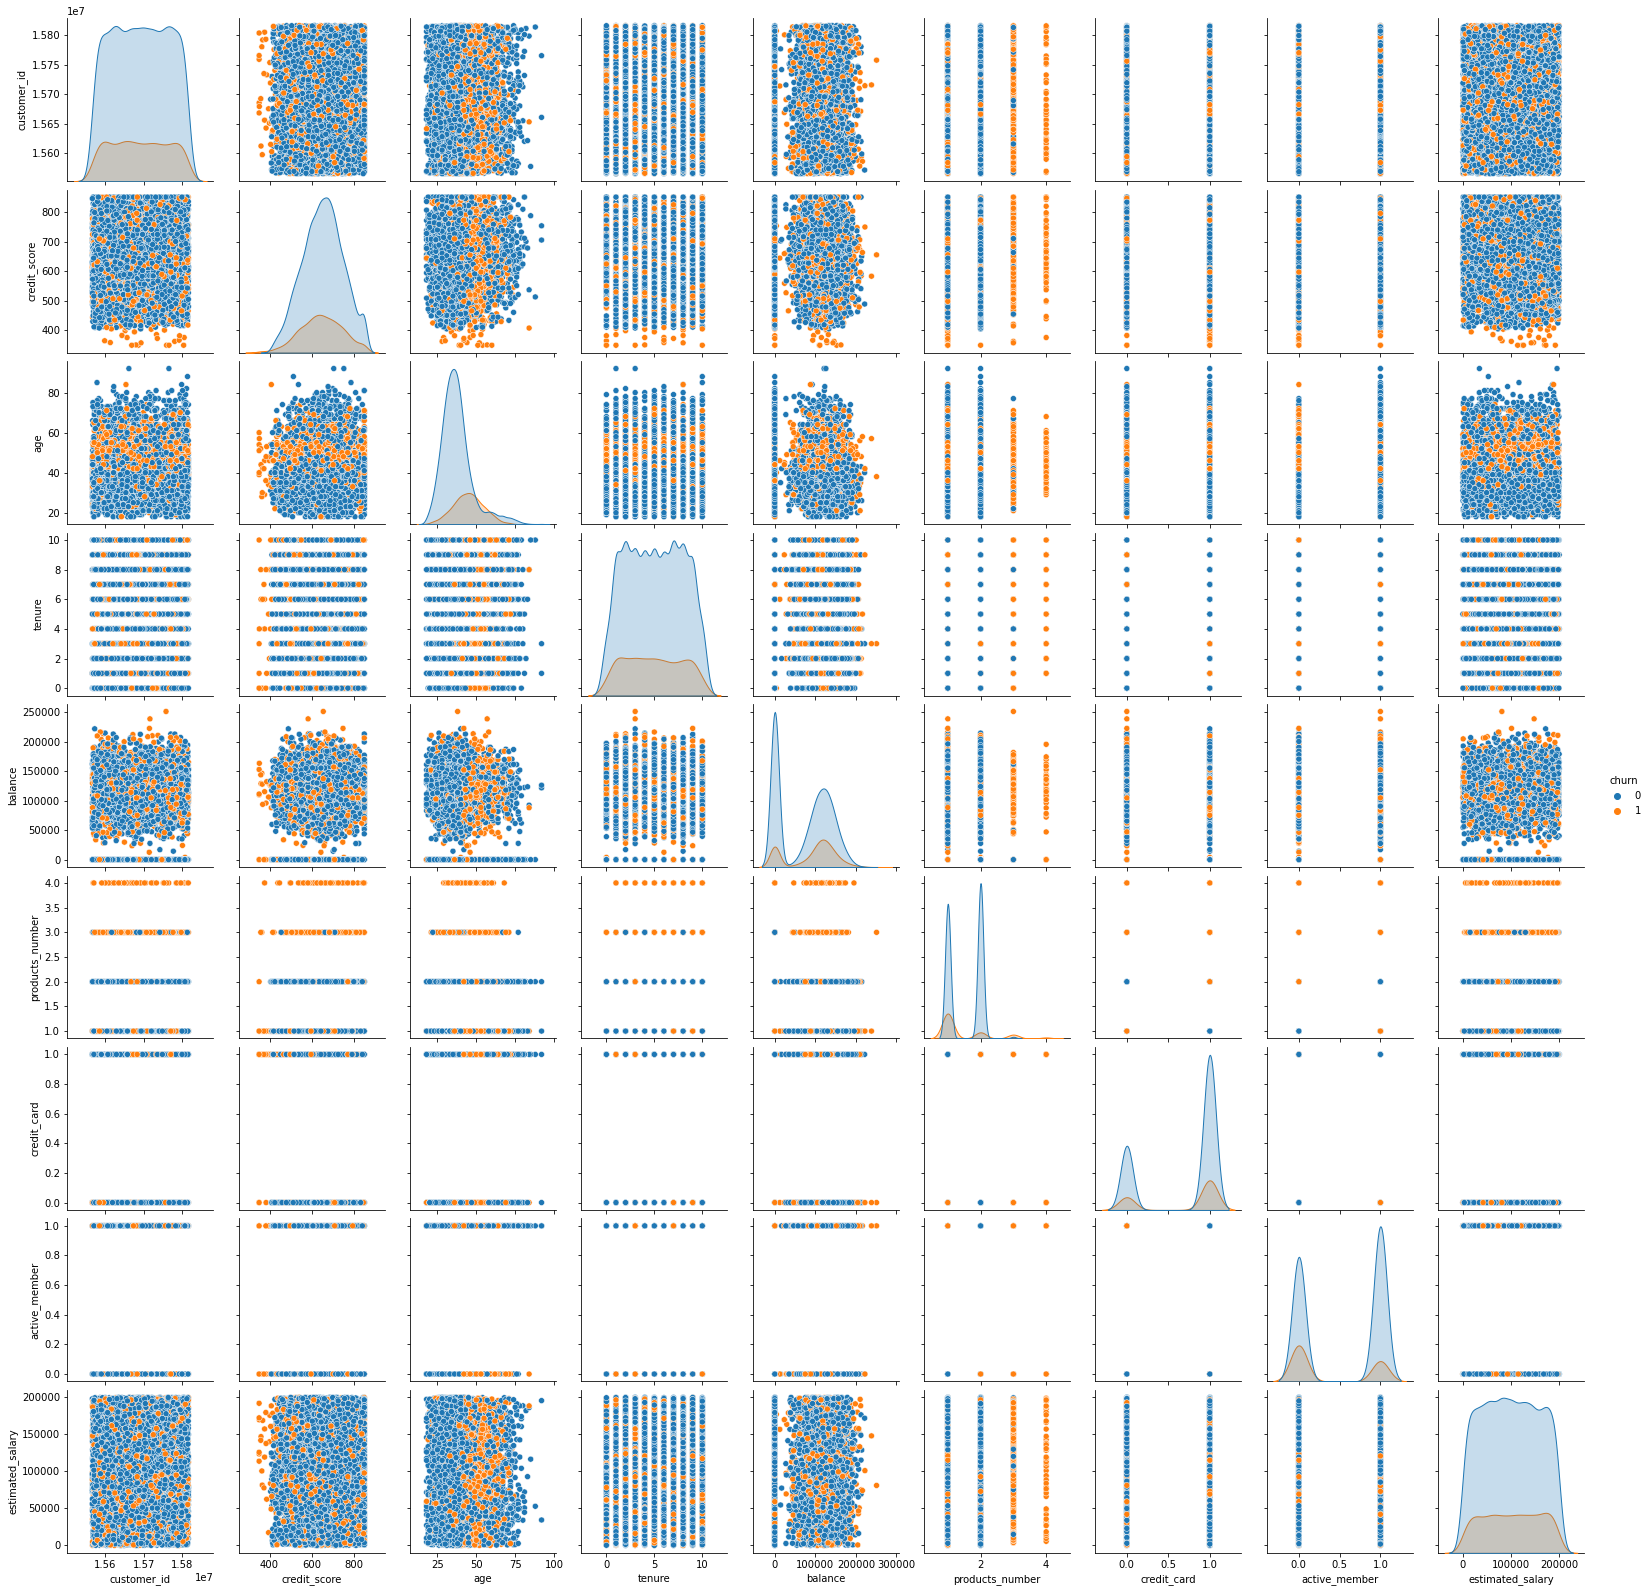

In [8]:
sns.pairplot(df, hue = 'churn')

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products_number'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'active_member'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

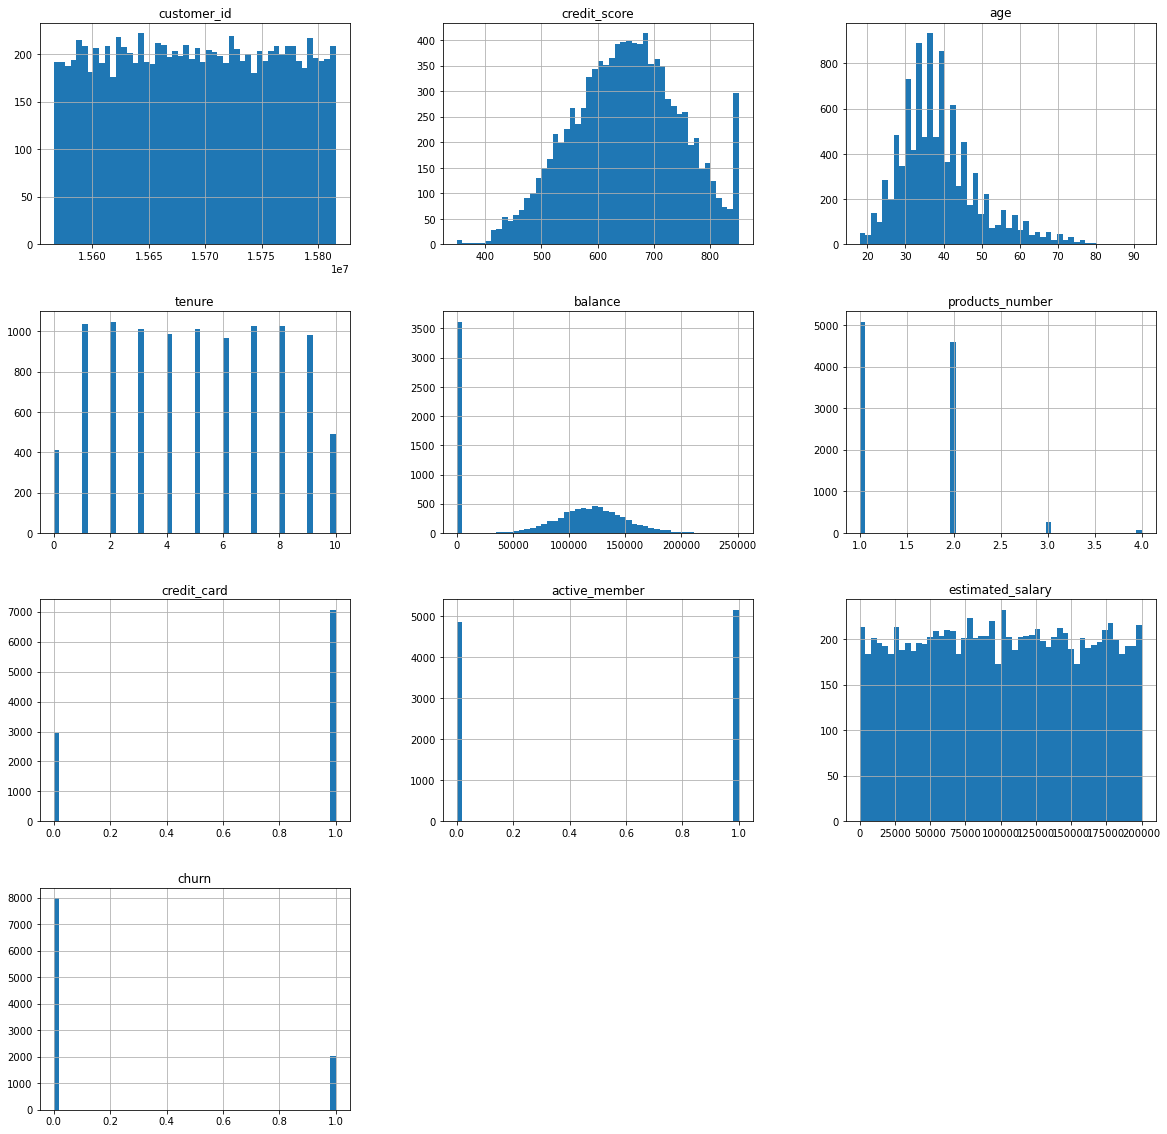

In [9]:
df.hist(bins = 50, figsize = (20,20))

In [10]:
# check the distribution
df['churn'].value_counts()/df.shape[0]

0    0.7963
1    0.2037
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

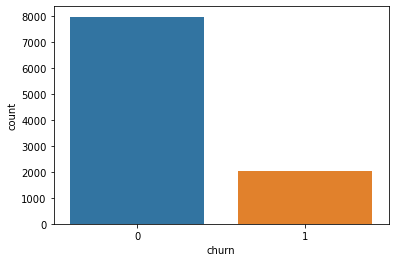

In [11]:
sns.countplot(x = 'churn', data = df)

In [12]:
df.drop('customer_id', axis = 1).corr()['churn'].sort_values(ascending=False)

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64

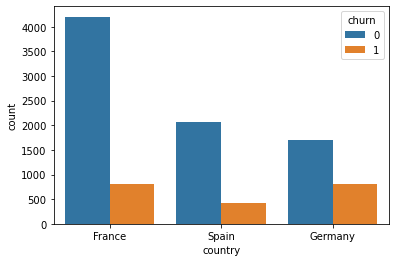

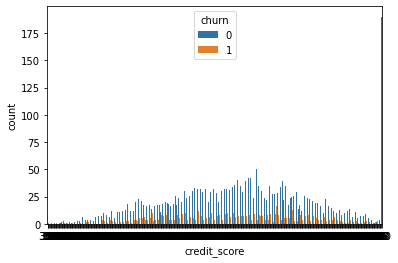

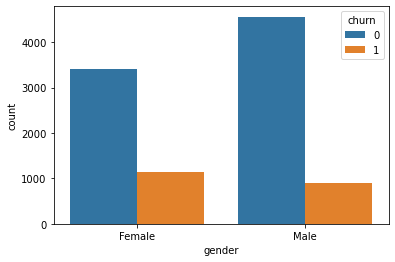

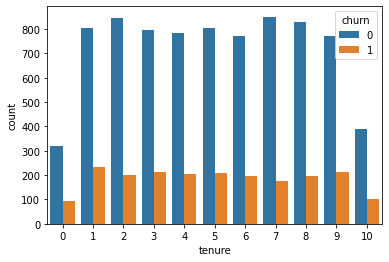

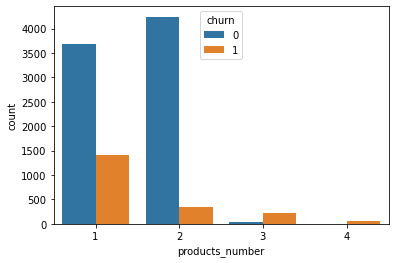

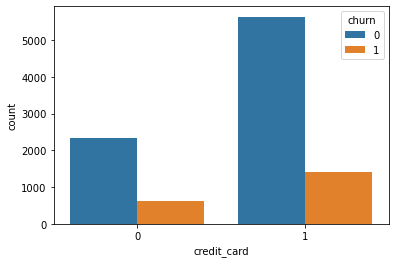

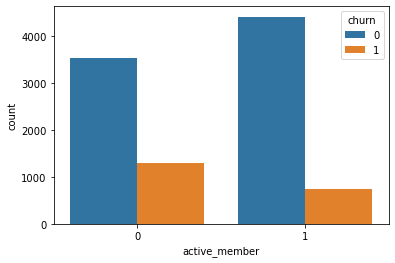

In [13]:
#looping through all the feature by y variable - see if there is relationship
features = [ 'country', 'credit_score', 'gender', 'tenure',
        'products_number', 'credit_card', 'active_member'        ]

for i in features:
    sns.countplot(x = i, data = df, hue = 'churn')
    plt.show()

In [14]:
#df1 = pd.get_dummies(df,columns = df.columns[df.dtypes ==object])
df1 = pd.get_dummies(df,columns = df[['country','gender','products_number']].columns)
df1

,customer_id,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male,products_number_1,products_number_2,products_number_3,products_number_4
0,15634602,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,1,0,0,0
1,15647311,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,1,0,0,0
2,15619304,502,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,1,0
3,15701354,699,39,1,0.00,0,0,93826.63,0,1,0,0,1,0,0,1,0,0
4,15737888,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,1,0,96270.64,0,1,0,0,0,1,0,1,0,0
9996,15569892,516,35,10,57369.61,1,1,101699.77,0,1,0,0,0,1,1,0,0,0
9997,15584532,709,36,7,0.00,0,1,42085.58,1,1,0,0,1,0,1,0,0,0
9998,15682355,772,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1,0,1,0,0


In [15]:
df1.drop('customer_id', axis = 1).corr()['churn'].sort_values(ascending=False)

churn                1.000000
age                  0.285323
products_number_3    0.255862
products_number_1    0.185447
country_Germany      0.173488
products_number_4    0.153612
balance              0.118533
gender_Female        0.106512
estimated_salary     0.012097
credit_card         -0.007138
tenure              -0.014001
credit_score        -0.027094
country_Spain       -0.052667
country_France      -0.104955
gender_Male         -0.106512
active_member       -0.156128
products_number_2   -0.292474
Name: churn, dtype: float64

In [16]:
X = df1.drop(['churn','customer_id'], axis = 1) 
y = df1['churn']
print(X.shape)
print(y.shape)

(10000, 16)
(10000,)


In [17]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf_lg = LogisticRegression(random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42) #why need max_depth
clf_rf = RandomForestClassifier(random_state=42) #why need max_depth


clf_lg.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

for clf in [clf_lg, clf_rf, clf_dt]:
    time_start = time()
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    cv_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))
    acc_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy'))
    print ('ROC_AUC CV score is {}'.format(cv_score))
    print ('Acc CV score is {}'.format(acc_score))
    print ("total time to train: {:.2f}s".format(time()-time_start))
    print ("")

Classifier: LogisticRegression
ROC_AUC CV score is 0.6706860457936369
Acc CV score is 0.7872498683351004
total time to train: 0.14s

Classifier: RandomForestClassifier
ROC_AUC CV score is 0.8466383903727625
Acc CV score is 0.8591241829955051
total time to train: 3.50s

Classifier: DecisionTreeClassifier
ROC_AUC CV score is 0.689661910840964
Acc CV score is 0.7906245402745512
total time to train: 0.17s



In [18]:
#Testing on test sets

for clf in [clf_lg, clf_rf, clf_dt]:
    time_start = time()
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    prediction = clf.predict(X_test)
    cv_score = roc_auc_score(y_test,prediction)
    print ('ROC_AUC score for test is {}'.format(cv_score))
    print ("total time to test: {:.2f}s".format(time()-time_start))
    print ("")
    print (classification_report(y_test,prediction))
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, prediction)}')
    print(f'Recall score: {recall_score(y_test,prediction)}')
    print(f'Precision score: {precision_score(y_test,prediction)}')
    print ("*"*100)
    print ("")

Classifier: LogisticRegression
ROC_AUC score for test is 0.5247335527930445
total time to test: 0.00s

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.44      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.52      0.50      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix: 
[[1572   35]
 [ 365   28]]
Recall score: 0.07124681933842239
Precision score: 0.4444444444444444
****************************************************************************************************

Classifier: RandomForestClassifier
ROC_AUC score for test is 0.719217450372179
total time to test: 0.06s

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83     

In [19]:
clf_lg = LogisticRegression(random_state=42,class_weight='balanced')
clf_dt = DecisionTreeClassifier(random_state=42) 
clf_rf = RandomForestClassifier(random_state=42) 


clf_lg.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

for clf in [clf_lg, clf_rf, clf_dt]:
    time_start = time()
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    cv_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))
    acc_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy'))
    print ('ROC_AUC CV score is {}'.format(cv_score))
    print ('Acc CV score is {}'.format(acc_score))
    print ("total time to train: {:.2f}s".format(time()-time_start))
    print ("")

Classifier: LogisticRegression
ROC_AUC CV score is 0.705934482984067
Acc CV score is 0.656625583092436
total time to train: 0.18s

Classifier: RandomForestClassifier
ROC_AUC CV score is 0.8466383903727625
Acc CV score is 0.8591241829955051
total time to train: 3.55s

Classifier: DecisionTreeClassifier
ROC_AUC CV score is 0.689661910840964
Acc CV score is 0.7906245402745512
total time to train: 0.16s



In [20]:
#Testing on test sets

for clf in [clf_lg, clf_rf, clf_dt]:
    time_start = time()
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    prediction = clf.predict(X_test)
    cv_score = roc_auc_score(y_test,prediction)
    print ('ROC_AUC score for test is {}'.format(cv_score))
    print ("total time to test: {:.2f}s".format(time()-time_start))
    print ("")
    print (classification_report(y_test,prediction))
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, prediction)}')
    print(f'Recall score: {recall_score(y_test,prediction)}')
    print(f'Precision score: {precision_score(y_test,prediction)}')
    print ("*"*100)
    print ("")

Classifier: LogisticRegression
ROC_AUC score for test is 0.6622624301125325
total time to test: 0.01s

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1607
           1       0.32      0.67      0.43       393

    accuracy                           0.66      2000
   macro avg       0.61      0.66      0.59      2000
weighted avg       0.78      0.66      0.69      2000

Confusion Matrix: 
[[1049  558]
 [ 129  264]]
Recall score: 0.6717557251908397
Precision score: 0.32116788321167883
****************************************************************************************************

Classifier: RandomForestClassifier
ROC_AUC score for test is 0.719217450372179
total time to test: 0.07s

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83     

In [21]:
#dealing with imbalanced
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)

X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [22]:
clf_lg = LogisticRegression(random_state=42,class_weight='balanced')
clf_dt = DecisionTreeClassifier(random_state=42) #why need max_depth
clf_rf = RandomForestClassifier(random_state=42) #why need max_depth


clf_lg.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

for clf in [clf_lg, clf_rf, clf_dt]:
    time_start = time()
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    cv_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))
    acc_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy'))
    print ('ROC_AUC CV score is {}'.format(cv_score))
    print ('Acc CV score is {}'.format(acc_score))
    print ("total time to train: {:.2f}s".format(time()-time_start))
    print ("")

Classifier: LogisticRegression


C:\Users\Chan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

ROC_AUC CV score is 0.7816494997693745
Acc CV score is 0.7153022740868353
total time to train: 0.36s

Classifier: RandomForestClassifier
ROC_AUC CV score is 0.9589894141079891
Acc CV score is 0.9028256274145173
total time to train: 4.86s

Classifier: DecisionTreeClassifier
ROC_AUC CV score is 0.8511270384551893
Acc CV score is 0.8511775215946767
total time to train: 0.21s



In [23]:
#Testing on test sets

for clf in [clf_lg, clf_rf, clf_dt]:
    time_start = time()
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    prediction = clf.predict(X_test)
    cv_score = roc_auc_score(y_test,prediction)
    print ('ROC_AUC score for test is {}'.format(cv_score))
    print ("total time to test: {:.2f}s".format(time()-time_start))
    print ("")
    print (classification_report(y_test,prediction))
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, prediction)}')
    print(f'Recall score: {recall_score(y_test,prediction)}')
    print(f'Precision score: {precision_score(y_test,prediction)}')
    #print(f'Precision score: {precision_score(y_test, prediction, average='weighted')}')
    print ("*"*100)
    print ("")

Classifier: LogisticRegression
ROC_AUC score for test is 0.6908370066982144
total time to test: 0.01s

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1633
           1       0.68      0.69      0.69      1553

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186

Confusion Matrix: 
[[1128  505]
 [ 480 1073]]
Recall score: 0.690920798454604
Precision score: 0.6799746514575412
****************************************************************************************************

Classifier: RandomForestClassifier
ROC_AUC score for test is 0.9136513135195732
total time to test: 0.07s

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1633
           1       0.93      0.89      0.91      1553

    accuracy                           0.91      3186
   macro avg       0.92      

In [24]:
#lets optimize Random Forest

param_grid = {'n_estimators': [60,100,200,300,600], #
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [6,10,16,26], #higher number will cause overfitting
              'min_samples_split': [6,8,10], #less number will cause overfitting
              'random_state': [42]
}

gs_rf = GridSearchCV(clf_rf,param_grid, scoring = 'roc_auc', cv = 3, verbose = 1, n_jobs = -1)

time_start = time()

print("Performing grid search...")
gs_rf.fit(X_train,y_train)
score = gs_rf.best_score_
        
print ('GridSearch best roc_auc score for random forest is: {}'.format(score))

#get parameters from best estimator
best_parameters = gs_rf.best_estimator_.get_params()
        
print("Best parameters:")
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print("")
print ("")
#get best estimator
clf_rf_best = gs_rf.best_estimator_

print("Total time to GridSearch: {:.2f}s".format(time()-time_start))
print("")

# Make predictions using the optimized model
best_prediction = clf_rf_best.predict(X_test)
cv_score = roc_auc_score(y_test,best_prediction)
print('ROC_AUC score for test is {}'.format(cv_score))
print ("")
print (classification_report(y_test,best_prediction))
print ("")

Performing grid search...
Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\Chan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearch best roc_auc score for random forest is: 0.9595238531807385
Best parameters:
	max_depth: 16
	max_features: 'auto'
	min_samples_split: 6
	n_estimators: 300
	random_state: 42


Total time to GridSearch: 306.32s

ROC_AUC score for test is 0.9133293560179634

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1633
           1       0.93      0.89      0.91      1553

    accuracy                           0.91      3186
   macro avg       0.92      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186




In [25]:
#Using Logistic Regression
#Set parameters for grid search
param_grid = {'solver': ['lbfgs', 'liblinear','sag', 'saga'],
              'max_iter': [50,100,200],
              'C': [0.05, 0.1, 0.5, 1.0,2.0,3.0, 10.0, 100.0]}


gs_lg = GridSearchCV(clf_lg, param_grid, scoring="roc_auc", cv=3, verbose=1, n_jobs=-1)
time_start = time()

print("Performing grid search...")
gs_lg.fit(X_train,y_train)
score = gs_lg.best_score_
        
print ('GridSearch best F2 score for logistic regression is: {}'.format(score))

#get parameters from best estimator
best_parameters = gs_lg.best_estimator_.get_params()
        
print("Best parameters:")
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print("")
print ("")
#get best estimator
clf_lg_best = gs_lg.best_estimator_

print("Total time to GridSearch: {:.2f}s".format(time()-time_start))
print("")

# Make predictions using the optimized model
best_prediction = clf_lg_best.predict(X_test)
cv_score = roc_auc_score(y_test,best_prediction)
print('ROC_AUC score for best prediction is {}'.format(cv_score))
print ("")
print (classification_report(y_test,best_prediction))
print ("")

Performing grid search...
Fitting 3 folds for each of 96 candidates, totalling 288 fits
GridSearch best F2 score for logistic regression is: 0.8677832584983164
Best parameters:
	C: 0.1
	max_iter: 50
	solver: 'liblinear'


Total time to GridSearch: 14.63s

ROC_AUC score for best prediction is 0.6856949530549291

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1633
           1       0.67      0.69      0.68      1553

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186




In [28]:
#RF has been choosen as best model as it has better score in ACCURACY, ROC, RECALL, and PRECISION
#make prediction by using the clf_rf_best model
new_df = pd.read_csv('./archive/customer to predict.csv')
new_df1 = pd.get_dummies(new_df,columns = df[['country','gender','products_number']].columns)

new_X = new_df1.drop(['customer_id'], axis = 1) 
new_y = clf_rf_best.predict(new_X)

output_df=pd.DataFrame([],columns=new_X.columns)
output_df[new_X.columns]=new_X
#output_df = output_df.reindex(columns = output_df.columns.tolist() + ['churn'])
output_df = output_df.assign(churn=new_y)
output_df

output_df.to_csv('prediction.csv')

#print(len(output_df))
#output_df[new_X.columns]=new_X
#print(len(output_df))

#output_df[new_X.columns]=new_X
#output_df1=pd.DataFrame([],columns=new_X.columns)
#output_df1['churn']=new_y
#type(new_y)

#for i in range(len(new_X)):
    #print(i)
    #output_df[new_X.columns,'churn']=new_X[:i]
    

In [30]:
import email
import smtplib
import ssl
from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials

In [31]:
filename = 'prediction.csv'
subject = "Customer Churn Listing"
body = """
        Dear Someone, <br><br>Please find the attached listing
        <br><br>Best regards,<br>Jupyter
        """
sender_email = "kienyoongchan@gmail.com" 
receiver_email = "kienyoongchan@gmail.com"
password = "xxx" #=> this is not my password. this is just to say that password should not be shared with anyone
message = MIMEMultipart()
message["From"] = sender_email
message['To'] = receiver_email
message["Subject"] = subject
message.attach(MIMEText(body, "html"))

with open(filename, 'rb') as attc:
    part = MIMEApplication(attc.read(), _subtype = "pdf")
part.add_header("Content-Disposition", "attachment", filename=str(filename))
message.attach(part)
text = message.as_string()
context = ssl.create_default_context()
with smtplib.SMTP_SSL('smtp.gmail.com', 465, context=context) as server:
    server.login(sender_email,password)
    server.sendmail(sender_email, receiver_email, text)
print("Successfully sent")

Successfully sent
